In [3]:
# Write your code here
import numpy as np
from types import SimpleNamespace

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [4]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

Point y: [0.20901926 0.37774759]
Point A: [0.26071605 0.43635845]
Point B: [0.21315735 0.274245  ]
Point C: [0.10056103 0.27951775]
Point D: [0.20634391 0.44272557]


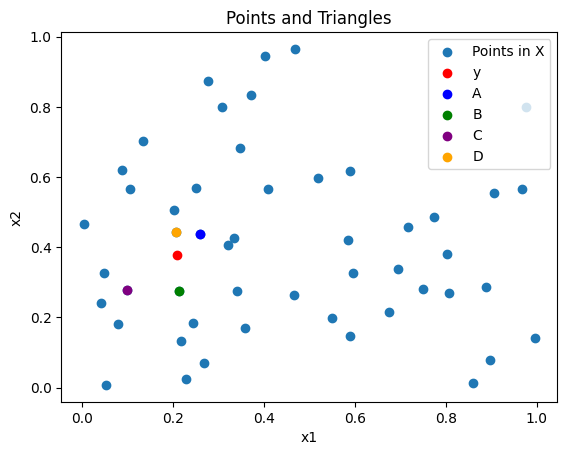

In [5]:
# write your answer here

import numpy as np
import matplotlib.pyplot as plt

# Function to find the points A, B, C, D
def find_points(X, y):
    # Initialize distances with a large value
    dist_A = np.inf
    dist_B = np.inf
    dist_C = np.inf
    dist_D = np.inf
    
    A, B, C, D = None, None, None, None
    
    for point in X:
        dist = np.linalg.norm(point - y)
        
        if point[0] > y[0] and point[1] > y[1] and dist < dist_A:
            A = point
            dist_A = dist
        
        if point[0] > y[0] and point[1] < y[1] and dist < dist_B:
            B = point
            dist_B = dist
        
        if point[0] < y[0] and point[1] < y[1] and dist < dist_C:
            C = point
            dist_C = dist
        
        if point[0] < y[0] and point[1] > y[1] and dist < dist_D:
            D = point
            dist_D = dist
    
    return A, B, C, D

A, B, C, D = find_points(X, y)

# Print the points for debugging
print(f'Point y: {y}')
print(f'Point A: {A}')
print(f'Point B: {B}')
print(f'Point C: {C}')
print(f'Point D: {D}')

# Plotting the points
plt.scatter(X[:,0], X[:,1], label='Points in X')
plt.scatter(y[0], y[1], color='red', label='y')
if A is not None:
    plt.scatter(A[0], A[1], color='blue', label='A')
if B is not None:
    plt.scatter(B[0], B[1], color='green', label='B')
if C is not None:
    plt.scatter(C[0], C[1], color='purple', label='C')
if D is not None:
    plt.scatter(D[0], D[1], color='orange', label='D')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Points and Triangles')
plt.show()



**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [6]:
# write your answer here

# Function to calculate barycentric coordinates
def barycentric_coordinates(x, A, B, C):
    denominator = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r1 = ((B[1] - C[1]) * (x[0] - C[0]) + (C[0] - B[0]) * (x[1] - C[1])) / denominator
    r2 = ((C[1] - A[1]) * (x[0] - C[0]) + (A[0] - C[0]) * (x[1] - C[1])) / denominator
    r3 = 1 - r1 - r2
    return r1, r2, r3

# Compute barycentric coordinates for y with respect to ABC and CDA

def compute_interpolation(y, A, B, C, D):
    if any(pt is None for pt in [A, B, C, D]):
        return np.nan

    rABC1, rABC2, rABC3 = barycentric_coordinates(y, A, B, C)
    rCDA1, rCDA2, rCDA3 = barycentric_coordinates(y, C, D, A)

    # Check if y is inside the triangle ABC
    if all(0 <= r <= 1 for r in [rABC1, rABC2, rABC3] if r is not None):
        return rABC1 * f(A) + rABC2 * f(B) + rABC3 * f(C)
    # Check if y is inside the triangle CDA
    elif all(0 <= r <= 1 for r in [rCDA1, rCDA2, rCDA3] if r is not None):
        return rCDA1 * f(C) + rCDA2 * f(D) + rCDA3 * f(A)
    else:
        return np.nan

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [7]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [8]:
# write your answer here

# Compute the approximation of f(y)
def interpolate_value(y, A, B, C, D, F, X):
    rABC1, rABC2, rABC3 = barycentric_coordinates(y, A, B, C)
    rCDA1, rCDA2, rCDA3 = barycentric_coordinates(y, C, D, A)
    
    if all(0 <= r <= 1 for r in [rABC1, rABC2, rABC3] if r is not None):
        return rABC1 * f(A) + rABC2 * f(B) + rABC3 * f(C)
    elif all(0 <= r <= 1 for r in [rCDA1, rCDA2, rCDA3] if r is not None):
        return rCDA1 * f(C) + rCDA2 * f(D) + rCDA3 * f(A)
    else:
        return np.nan

f_y_approx = interpolate_value(y, A, B, C, D, F, X)
f_y_true = f(y)

print(f'Approximate value of f(y): {f_y_approx}')
print(f'True value of f(y): {f_y_true}')



Approximate value of f(y): 0.08405201731052576
True value of f(y): 0.0789565216259594


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [9]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [10]:
# write your answer here
import pandas as pd

Y = np.array(Y)

# Compute the interpolated and true values for all points in Y
results = []
for y in Y:
    A, B, C, D = find_points(X, y)

    '''
    # Print the points for debugging
    print(f'For point y={y}:')
    print(f'Point A: {A}')
    print(f'Point B: {B}')
    print(f'Point C: {C}')
    print(f'Point D: {D}')
    '''

    f_y_approx = compute_interpolation(y, A, B, C, D)
    f_y_true = f(y)
    results.append((y, f_y_approx, f_y_true))

df_results = pd.DataFrame(results, columns=['y', 'f_y_approx', 'f_y_true'])
print(df_results)

# Explanation of the NaN value:
# The NaN value for the point [0.8, 0.8] in the example is due to the absence
# of a point in the 50-element set X that satisfies the triangels ABC,CDA seraching algorithm condition x[1] > 0.8 and x[2] > 0.8.
# Increasing the number of points in X would help to ensure that appropriate points can be found but such improvemnts are not required in the exam questions

            y  f_y_approx  f_y_true
0  [0.2, 0.2]    0.040326      0.04
1  [0.8, 0.2]    0.158742      0.16
2  [0.8, 0.8]         NaN      0.64
3  [0.8, 0.2]    0.158742      0.16
4  [0.5, 0.5]    0.251290      0.25
